In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import os

22:34:18 - cmdstanpy - INFO - Chain [1] start processing
22:34:19 - cmdstanpy - INFO - Chain [1] done processing


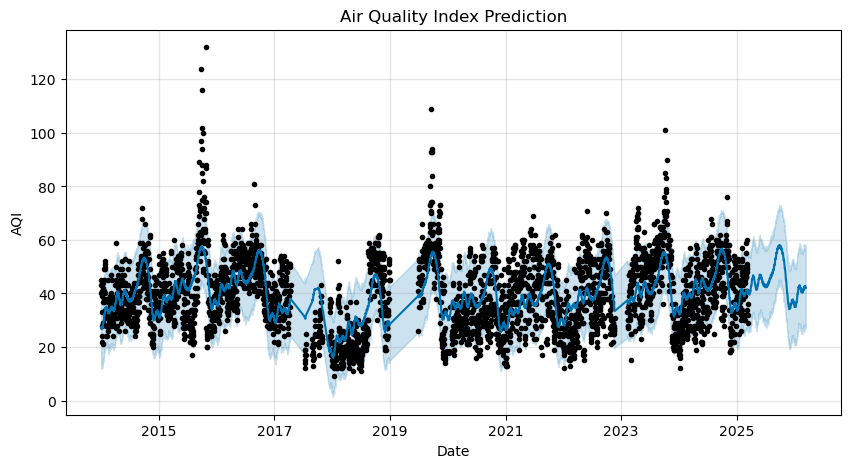

             ds           y
0    2014-01-01   45.000000
1    2014-01-02   43.000000
2    2014-01-03   40.000000
3    2014-01-04   33.000000
4    2014-01-05   22.000000
5    2014-01-06   24.000000
6    2014-01-07   41.000000
7    2014-01-08   39.000000
8    2014-01-09   28.000000
9    2014-01-10   29.000000
10   2014-01-11   21.000000
11   2014-01-12   29.000000
12   2014-01-13   37.000000
13   2014-01-14   42.000000
14   2014-01-15   44.000000
15   2014-01-16   49.000000
16   2014-01-17   45.000000
17   2014-01-18   37.000000
18   2014-01-19   38.000000
19   2014-01-20   41.000000
20   2014-01-21   41.000000
21   2014-01-22   45.000000
22   2014-01-23   51.000000
23   2014-01-24   52.000000
24   2014-01-25   50.000000
25   2014-01-26   49.000000
26   2014-01-27   40.000000
27   2014-01-28   34.000000
28   2014-01-29   33.000000
29   2014-01-30   31.000000
30   2014-01-31   32.000000
31   2014-02-01   32.000000
32   2014-02-02   28.000000
33   2014-02-03   24.000000
34   2014-02-04   33

In [ ]:
def predict_aqi(csv_file, future_days=30):
    # Load data
    df = pd.read_csv(csv_file, parse_dates=['date'])

    # Ensure correct column names
    df.columns = df.columns.str.strip().str.lower()  # Handle whitespace issues
    df.rename(columns={'date': 'ds', 'aqi': 'y'}, inplace=True)  # Prophet requires 'ds' and 'y' column names

    # Convert date column to datetime format
    df["ds"] = pd.to_datetime(df["ds"])
    df = df.sort_values(by='ds', ascending=True)

    # Drop missing values and clip dataset to start from the first valid entry
    df['y'] = pd.to_numeric(df['y'], errors='coerce')  # Convert to numeric, forcing errors to NaN
    df = df.dropna()

    # print(df.to_string())
    
    # Initialize and fit the model
    model = Prophet()
    model.fit(df)
    
    # Create future dataframe
    future = model.make_future_dataframe(periods=future_days)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot results
    fig, ax = plt.subplots(figsize=(10, 5))
    model.plot(forecast, ax=ax)
    plt.title("Air Quality Index Prediction")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.show()

    # Append predicted values to the original dataframe
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': 'y'}, inplace=True)
    df = pd.concat([df, forecast.iloc[-future_days:]], ignore_index=True)
    
    
    return df

# Example usage
file_path = "data/Johor/kota-tinggi,johor-air-quality.csv"
forecast = predict_aqi(file_path, future_days=365)
print(forecast.to_string())


In [2]:
def predict_aqi(csv_file, future_days=365):
    # Load data
    df = pd.read_csv(csv_file, parse_dates=['date'])

    # Ensure correct column names
    df.columns = df.columns.str.strip().str.lower()
    df.rename(columns={'date': 'ds', 'aqi': 'y'}, inplace=True)

    # Convert date column to datetime format and sort
    df["ds"] = pd.to_datetime(df["ds"])
    df = df.sort_values(by='ds', ascending=True)

    # Handle missing values
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df = df.dropna()

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Create future dataframe and predict
    future = model.make_future_dataframe(periods=future_days)
    forecast = model.predict(future)

    # Keep only required columns
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': 'y'}, inplace=True)

    # Append predicted values to original dataset
    df = pd.concat([df, forecast.iloc[-future_days:]], ignore_index=True)

    return df[['ds', 'y']]

# Define base directory
base_dir = "data"
output_file = "malaysia_predicted_aqi.csv"

# Initialize empty DataFrame
final_df = pd.DataFrame(columns=["state", "city", "date", "aqi"])
final_df["state"] = final_df["state"].astype(str)
final_df["city"] = final_df["city"].astype(str)
final_df["date"] = pd.to_datetime(final_df["date"])  # Ensuring date column has correct type
final_df["aqi"] = final_df["aqi"].astype(float)

# Loop through all states and cities
for state in os.listdir(base_dir):
    state_path = os.path.join(base_dir, state)
    if os.path.isdir(state_path):  # Ensure it's a directory
        for city_file in os.listdir(state_path):
            if city_file.endswith(".csv"):
                # city_name = city_file.replace("-air-quality.csv", "").replace(",", "-")  # Adjust city name format
                city_name = city_file.replace(".csv", "") # Adjust city name format
                csv_path = os.path.join(state_path, city_file)

                print(f"Processing: {state} - {city_name}")
                city_forecast = predict_aqi(csv_path, future_days=365)

                # Add state and city columns
                city_forecast.insert(0, "city", city_name)
                city_forecast.insert(0, "state", state)
                city_forecast.rename(columns={'ds': 'date', 'y': 'aqi'}, inplace=True)

                # Append results to DataFrame
                final_df = pd.concat([final_df, city_forecast], ignore_index=True)

# Save to CSV
final_df.to_csv(output_file, index=False)
print(f"Predictions saved to {output_file}")


Processing: Johor - Batu_Pahat


23:39:36 - cmdstanpy - INFO - Chain [1] start processing
23:39:37 - cmdstanpy - INFO - Chain [1] done processing
23:39:37 - cmdstanpy - INFO - Chain [1] start processing


Processing: Johor - Kluang


23:39:37 - cmdstanpy - INFO - Chain [1] done processing


Processing: Johor - Kota_Tinggi


23:39:38 - cmdstanpy - INFO - Chain [1] start processing
23:39:38 - cmdstanpy - INFO - Chain [1] done processing


Processing: Johor - Larkin_Lama


23:39:39 - cmdstanpy - INFO - Chain [1] start processing
23:39:40 - cmdstanpy - INFO - Chain [1] done processing
23:39:40 - cmdstanpy - INFO - Chain [1] start processing


Processing: Johor - Muar


23:39:40 - cmdstanpy - INFO - Chain [1] done processing


Processing: Johor - Pasir_Gudang


23:39:41 - cmdstanpy - INFO - Chain [1] start processing
23:39:41 - cmdstanpy - INFO - Chain [1] done processing
23:39:42 - cmdstanpy - INFO - Chain [1] start processing


Processing: Johor - Pengerang


23:39:42 - cmdstanpy - INFO - Chain [1] done processing
23:39:42 - cmdstanpy - INFO - Chain [1] start processing


Processing: Johor - Segamat


23:39:42 - cmdstanpy - INFO - Chain [1] done processing
23:39:43 - cmdstanpy - INFO - Chain [1] start processing


Processing: Johor - Tangkak


23:39:43 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kedah - Alor_Setar


23:39:44 - cmdstanpy - INFO - Chain [1] start processing
23:39:44 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kedah - Bakar_Arang


23:39:45 - cmdstanpy - INFO - Chain [1] start processing
23:39:45 - cmdstanpy - INFO - Chain [1] done processing
23:39:46 - cmdstanpy - INFO - Chain [1] start processing


Processing: Kedah - Kulim_Hi_Tech


23:39:46 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kedah - Langkawi


23:39:46 - cmdstanpy - INFO - Chain [1] start processing
23:39:47 - cmdstanpy - INFO - Chain [1] done processing
23:39:47 - cmdstanpy - INFO - Chain [1] start processing


Processing: Kelantan - Kota_Bharu


23:39:48 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kelantan - Tanah_Merah


23:39:48 - cmdstanpy - INFO - Chain [1] start processing
23:39:49 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kuala Lumpur - Batu_Muda


23:39:49 - cmdstanpy - INFO - Chain [1] start processing
23:39:50 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kuala Lumpur - Cheras


23:39:50 - cmdstanpy - INFO - Chain [1] start processing
23:39:51 - cmdstanpy - INFO - Chain [1] done processing


Processing: Kuala Lumpur - Kuala_Lumpur


23:39:51 - cmdstanpy - INFO - Chain [1] start processing
23:39:52 - cmdstanpy - INFO - Chain [1] done processing


Processing: Melaka - Alor_Gajah


23:39:52 - cmdstanpy - INFO - Chain [1] start processing
23:39:52 - cmdstanpy - INFO - Chain [1] done processing


Processing: Melaka - Bandaraya


23:39:53 - cmdstanpy - INFO - Chain [1] start processing
23:39:53 - cmdstanpy - INFO - Chain [1] done processing


Processing: Melaka - Bukit_Rambai


23:39:54 - cmdstanpy - INFO - Chain [1] start processing
23:39:54 - cmdstanpy - INFO - Chain [1] done processing


Processing: Negeri_Sembilan - Nilai


23:39:55 - cmdstanpy - INFO - Chain [1] start processing
23:39:55 - cmdstanpy - INFO - Chain [1] done processing


Processing: Negeri_Sembilan - Port_Dickson


23:39:56 - cmdstanpy - INFO - Chain [1] start processing
23:39:56 - cmdstanpy - INFO - Chain [1] done processing


Processing: Negeri_Sembilan - Seremban


23:39:57 - cmdstanpy - INFO - Chain [1] start processing
23:39:57 - cmdstanpy - INFO - Chain [1] done processing


Processing: Pahang - Balok_Baru


23:39:58 - cmdstanpy - INFO - Chain [1] start processing
23:39:58 - cmdstanpy - INFO - Chain [1] done processing


Processing: Pahang - Indera_Mahkota


23:39:59 - cmdstanpy - INFO - Chain [1] start processing
23:39:59 - cmdstanpy - INFO - Chain [1] done processing


Processing: Pahang - Jerantut


23:40:00 - cmdstanpy - INFO - Chain [1] start processing
23:40:00 - cmdstanpy - INFO - Chain [1] done processing
23:40:01 - cmdstanpy - INFO - Chain [1] start processing


Processing: Pahang - Rompin


23:40:01 - cmdstanpy - INFO - Chain [1] done processing
23:40:02 - cmdstanpy - INFO - Chain [1] start processing


Processing: Pahang - Temerloh


23:40:02 - cmdstanpy - INFO - Chain [1] done processing
23:40:02 - cmdstanpy - INFO - Chain [1] start processing


Processing: Penang - Balik_Pulau


23:40:03 - cmdstanpy - INFO - Chain [1] done processing
23:40:03 - cmdstanpy - INFO - Chain [1] start processing


Processing: Penang - Minden


23:40:03 - cmdstanpy - INFO - Chain [1] done processing


Processing: Penang - Perai


23:40:04 - cmdstanpy - INFO - Chain [1] start processing
23:40:04 - cmdstanpy - INFO - Chain [1] done processing


Processing: Penang - Seberang_Jaya_2


23:40:05 - cmdstanpy - INFO - Chain [1] start processing
23:40:05 - cmdstanpy - INFO - Chain [1] done processing
23:40:06 - cmdstanpy - INFO - Chain [1] start processing


Processing: Perak - Ipoh


23:40:06 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perak - Jalan_Tasek_Ipoh


23:40:07 - cmdstanpy - INFO - Chain [1] start processing
23:40:07 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perak - kg._air_putih_taiping


23:40:08 - cmdstanpy - INFO - Chain [1] start processing
23:40:08 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perak - Seri_Manjung


23:40:08 - cmdstanpy - INFO - Chain [1] start processing
23:40:09 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perak - s_k_Jalan_Pegoh_Ipoh


23:40:09 - cmdstanpy - INFO - Chain [1] start processing
23:40:10 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perak - Tanjung_Malim


23:40:10 - cmdstanpy - INFO - Chain [1] start processing
23:40:11 - cmdstanpy - INFO - Chain [1] done processing


Processing: Perlis - Kangar


23:40:11 - cmdstanpy - INFO - Chain [1] start processing
23:40:12 - cmdstanpy - INFO - Chain [1] done processing
23:40:12 - cmdstanpy - INFO - Chain [1] start processing


Processing: Putrajaya - Putrajaya_W.P.


23:40:13 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sabah - Keningau


23:40:13 - cmdstanpy - INFO - Chain [1] start processing
23:40:13 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sabah - Kimanis


23:40:14 - cmdstanpy - INFO - Chain [1] start processing
23:40:14 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sabah - Kota_Kinabalu


23:40:15 - cmdstanpy - INFO - Chain [1] start processing
23:40:15 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sabah - Sandakan


23:40:16 - cmdstanpy - INFO - Chain [1] start processing
23:40:16 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sabah - Tawau


23:40:17 - cmdstanpy - INFO - Chain [1] start processing
23:40:17 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Bintulu


23:40:18 - cmdstanpy - INFO - Chain [1] start processing
23:40:18 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - ilp_Miri


23:40:19 - cmdstanpy - INFO - Chain [1] start processing
23:40:19 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Kapit


23:40:20 - cmdstanpy - INFO - Chain [1] start processing
23:40:20 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Kuching


23:40:21 - cmdstanpy - INFO - Chain [1] start processing
23:40:22 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Limbang


23:40:22 - cmdstanpy - INFO - Chain [1] start processing
23:40:23 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Miri


23:40:23 - cmdstanpy - INFO - Chain [1] start processing
23:40:24 - cmdstanpy - INFO - Chain [1] done processing
23:40:24 - cmdstanpy - INFO - Chain [1] start processing


Processing: Sarawak - Mukah


23:40:25 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Samarahan


23:40:25 - cmdstanpy - INFO - Chain [1] start processing
23:40:25 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Sarikei


23:40:26 - cmdstanpy - INFO - Chain [1] start processing
23:40:27 - cmdstanpy - INFO - Chain [1] done processing
23:40:27 - cmdstanpy - INFO - Chain [1] start processing


Processing: Sarawak - Semalaju


23:40:28 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Sibu


23:40:28 - cmdstanpy - INFO - Chain [1] start processing
23:40:28 - cmdstanpy - INFO - Chain [1] done processing


Processing: Sarawak - Sri_Aman


23:40:29 - cmdstanpy - INFO - Chain [1] start processing
23:40:29 - cmdstanpy - INFO - Chain [1] done processing


Processing: Selangor - Banting


23:40:30 - cmdstanpy - INFO - Chain [1] start processing
23:40:31 - cmdstanpy - INFO - Chain [1] done processing


Processing: Selangor - Klang


23:40:31 - cmdstanpy - INFO - Chain [1] start processing
23:40:31 - cmdstanpy - INFO - Chain [1] done processing


Processing: Selangor - Kuala_Selangor


23:40:32 - cmdstanpy - INFO - Chain [1] start processing
23:40:32 - cmdstanpy - INFO - Chain [1] done processing


Processing: Selangor - Petaling_Jaya


23:40:33 - cmdstanpy - INFO - Chain [1] start processing
23:40:33 - cmdstanpy - INFO - Chain [1] done processing


Processing: Selangor - Shah_Alam


23:40:34 - cmdstanpy - INFO - Chain [1] start processing
23:40:34 - cmdstanpy - INFO - Chain [1] done processing
23:40:35 - cmdstanpy - INFO - Chain [1] start processing


Processing: Terengganu - Besut


23:40:35 - cmdstanpy - INFO - Chain [1] done processing


Processing: Terengganu - Kemaman


23:40:36 - cmdstanpy - INFO - Chain [1] start processing
23:40:36 - cmdstanpy - INFO - Chain [1] done processing


Processing: Terengganu - Kuala_Terengganu


23:40:37 - cmdstanpy - INFO - Chain [1] start processing
23:40:37 - cmdstanpy - INFO - Chain [1] done processing


Processing: Terengganu - Paka


23:40:38 - cmdstanpy - INFO - Chain [1] start processing
23:40:38 - cmdstanpy - INFO - Chain [1] done processing


Predictions saved to malaysia_predicted_aqi.csv
